Importing necessary Modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2           # make_hastie_10_2 generates a data set for binary classification 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

RSEED = 42

In [3]:
df = pd.read_excel("data/drug_consumption.xls")

Getting to know the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [5]:
df.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [6]:
df.shape

(1885, 32)

Having a look at some simple, descriptive statistics 

In [7]:
# Having a look at some simple, descriptive statistics 
df.describe().round(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00,1885.00
mean,945.29,0.03,-0.00,-0.00,0.36,-0.31,0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00
std,545.17,0.88,0.48,0.95,0.70,0.17,1.00,1.00,1.00,1.00,1.00,0.95,0.96
min,1.00,-0.95,-0.48,-2.44,-0.57,-1.11,-3.46,-3.27,-3.27,-3.46,-3.46,-2.56,-2.08
25%,474.00,-0.95,-0.48,-0.61,-0.57,-0.32,-0.68,-0.70,-0.72,-0.61,-0.65,-0.71,-0.53
50%,946.00,-0.08,-0.48,-0.06,0.96,-0.32,0.04,0.00,-0.02,-0.02,-0.01,-0.22,0.08
75%,1417.00,0.50,0.48,0.45,0.96,-0.32,0.63,0.64,0.72,0.76,0.58,0.53,0.77
max,1888.00,2.59,0.48,1.98,0.96,1.91,3.27,3.27,2.90,3.46,3.46,2.90,1.92


Remove the "Index" column from the data set:

In [8]:
# Checking for missing values
missing = pd.DataFrame(df.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/df.shape[0])*100, 2)
missing[missing['Amount'] != 0]

,Amount,Percentage


As a result we do NOT have missing entries ANYWHERE!

Preliminary findings: We have 12 float64 columns, 1 int64 and 19 object columns. As a next step I would  like to transform the object columns with dummy variables:

Prepare a pipeline by creating lists of all categorical AND numerical predictors in the data set:

In [9]:
# Creating list for categorical predictors/features 
# (dates are also objects so if you have them in your data you would deal with them first)
cat_features = list(df.columns[df.dtypes==object])
cat_features

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Shrooms',
 'Nicotine',
 'Semer',
 'VSA']

In [10]:
# Creating list for numerical predictors/features
# Since 'Survived' is our target variable we will exclude this feature from this list of numerical predictors 
num_features = list(df.columns[df.dtypes!=object])
#num_features.remove('Survived')
num_features

['ID',
 'Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive',
 'SS']

In [11]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Shrooms         7
Nicotine        7
Semer           5
VSA             7
dtype: int64

Define predictors and variables:

/Users/borisgeller/neuefische/Drug-Consumption/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

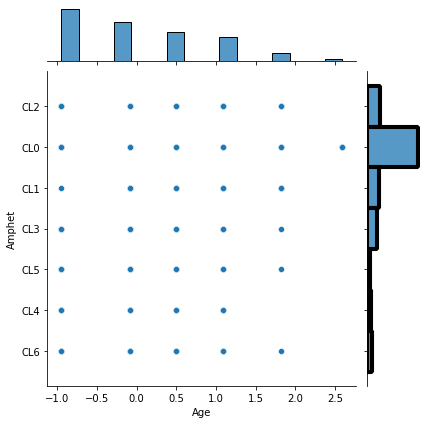

In [12]:
# Your code here!
fig = plt.figure(figsize= (20,20))
sns.jointplot(df["Age"],df.Amphet, hue=None);

<AxesSubplot:xlabel='Amphet', ylabel='Count'>

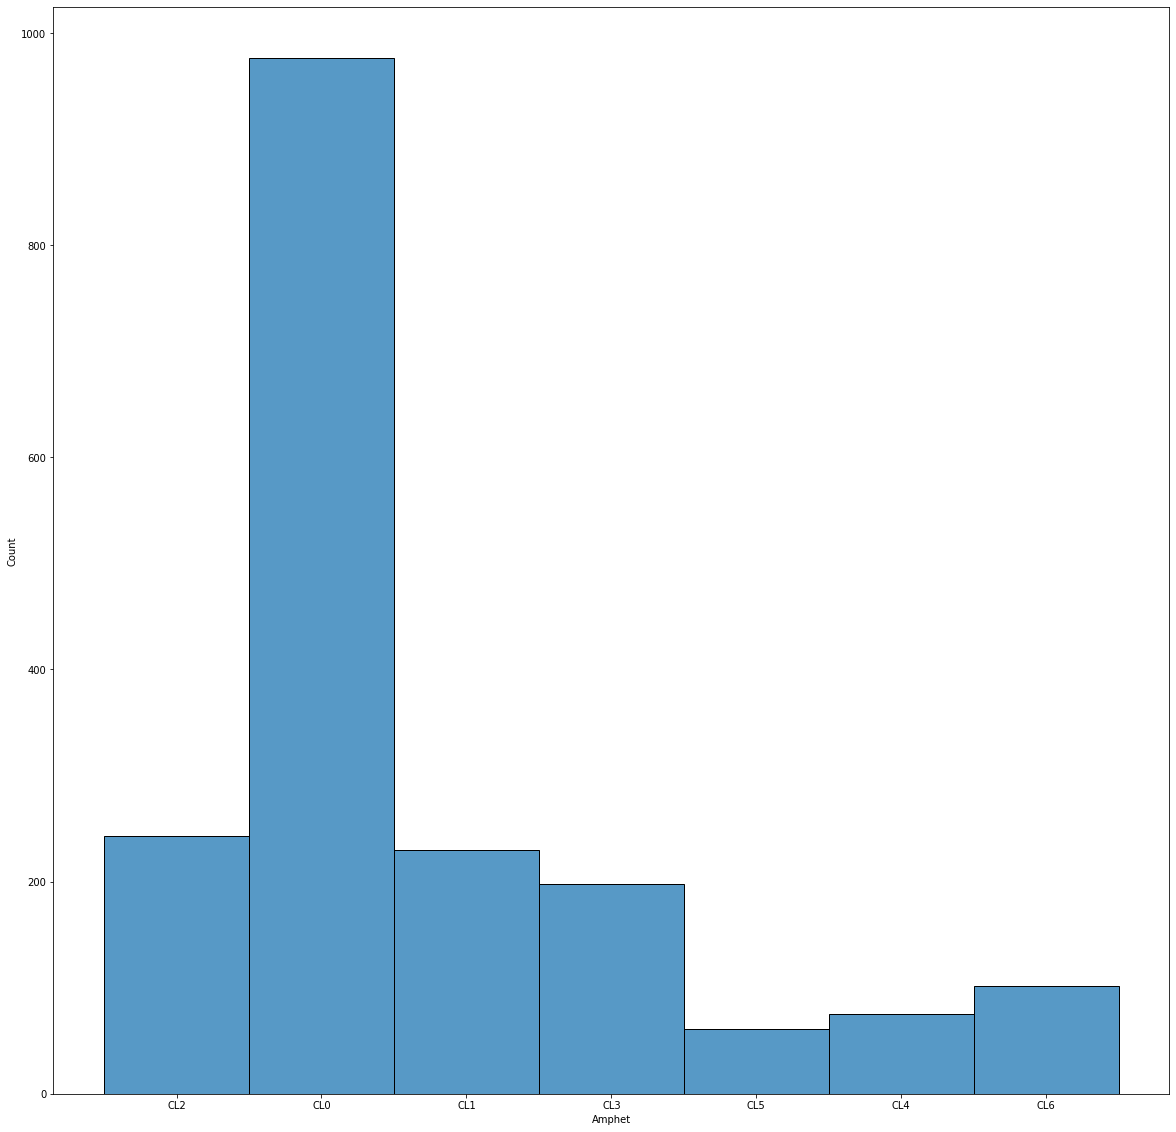

In [13]:
# Your code here!
fig = plt.figure(figsize= (20,20))
sns.histplot(df.Amphet, hue=None)


Amphet
CL0    AxesSubplot(0.125,0.125;0.775x0.755)
CL1    AxesSubplot(0.125,0.125;0.775x0.755)
CL2    AxesSubplot(0.125,0.125;0.775x0.755)
CL3    AxesSubplot(0.125,0.125;0.775x0.755)
CL4    AxesSubplot(0.125,0.125;0.775x0.755)
CL5    AxesSubplot(0.125,0.125;0.775x0.755)
CL6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

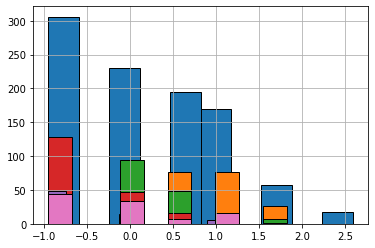

In [14]:
# Your code here!
df.groupby("Amphet")["Age"].hist()

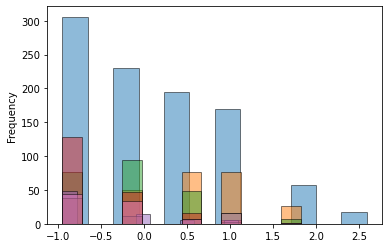

In [15]:
ax = df.groupby("Amphet")["Age"].plot.hist(bins=12, alpha=0.5)

Duplicate the Dataframe to perform some column conversions to make it more readable

In [16]:
df_readable = df.copy()

Decrypt some of the Feature columns to make them more human-readable:

In [17]:
# decrypt "Age" column:
df_readable['Age'] = df_readable['Age'].map({-0.95197:'18-24',
                            -0.07854:'25-34',
                             0.49788:'35-44',
                             1.09449:'45-54',
                             1.82213:'55-64',
                             2.59171:'65+',
                             },)
# decrypt "Gender" column:
df_readable['Gender'] = df_readable['Gender'].map({0.48246:'Female',
                            -0.48246:'Male',
                             },)
# decrypt "Education" column:
df_readable['Education'] = df_readable['Education'].map({-2.43591:0,
                            -1.73790:0,
                            -1.43719:0,
                            -1.22751:0,
                            -0.61113:0,
                            -0.05921:1,
                             0.45468:1,
                             1.16365:1,
                             1.98437:1,
                             },)
# decrypt "Ethnicity" column:
df_readable['Ethnicity'] = df_readable['Ethnicity'].map({-0.50212:'Asian',
                            -1.10702:'Black',
                             1.90725:'Mixed-Black/Asian',
                             0.12600:'Mixed-White/Asian',
                            -0.22166:'Mixed-White/Black',
                             0.11440:'Other',
                            -0.31685:'White',
                             },)
# replace column values with country names
df_readable['Country'] = df_readable['Country'].map({-0.09765:'Australia',
                             0.24923:'Canada',
                            -0.46841:'New Zealand',
                            -0.28519: "Other",
                             0.21128:"Republic of Ireland",
                             0.96082:"UK",
                            -0.57009:"USA",
                             },)

df_readable.tail(15)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1870,1874,25-34,Female,1,Other,White,-1.05308,0.96248,1.88511,1.81866,...,CL3,CL0,CL0,CL0,CL3,CL0,CL1,CL5,CL0,CL0
1871,1875,18-24,Male,0,USA,White,1.02119,-0.43999,1.43533,-1.07533,...,CL3,CL6,CL3,CL5,CL3,CL3,CL0,CL6,CL0,CL6
1872,1876,18-24,Male,0,Canada,White,-0.79151,0.00332,2.44904,0.76096,...,CL2,CL0,CL2,CL2,CL0,CL0,CL0,CL0,CL0,CL0
1873,1877,18-24,Male,0,USA,White,0.73545,-1.23177,0.58331,-0.60633,...,CL3,CL2,CL0,CL5,CL2,CL2,CL3,CL6,CL0,CL2
1874,1878,65+,Male,0,USA,White,2.12700,-0.15487,2.44904,0.94156,...,CL0,CL0,CL0,CL0,CL1,CL0,CL1,CL0,CL0,CL0
1875,1879,18-24,Male,0,USA,Mixed-White/Asian,-0.05188,-1.76250,0.58331,-0.76096,...,CL5,CL0,CL0,CL2,CL4,CL0,CL4,CL6,CL0,CL2
1876,1880,25-34,Male,0,Canada,Other,-0.14882,-0.57545,1.43533,-0.91699,...,CL3,CL0,CL3,CL5,CL3,CL0,CL4,CL2,CL0,CL2
1877,1881,18-24,Male,0,USA,White,1.49158,-1.92173,-0.58331,-1.77200,...,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1878,1882,18-24,Male,1,Canada,White,-0.05188,-1.76250,0.88309,-0.76096,...,CL0,CL0,CL0,CL2,CL0,CL0,CL2,CL2,CL0,CL0
1879,1883,18-24,Male,0,Other,White,-0.79151,0.32197,0.29338,-0.30172,...,CL5,CL2,CL0,CL4,CL5,CL4,CL0,CL6,CL0,CL1


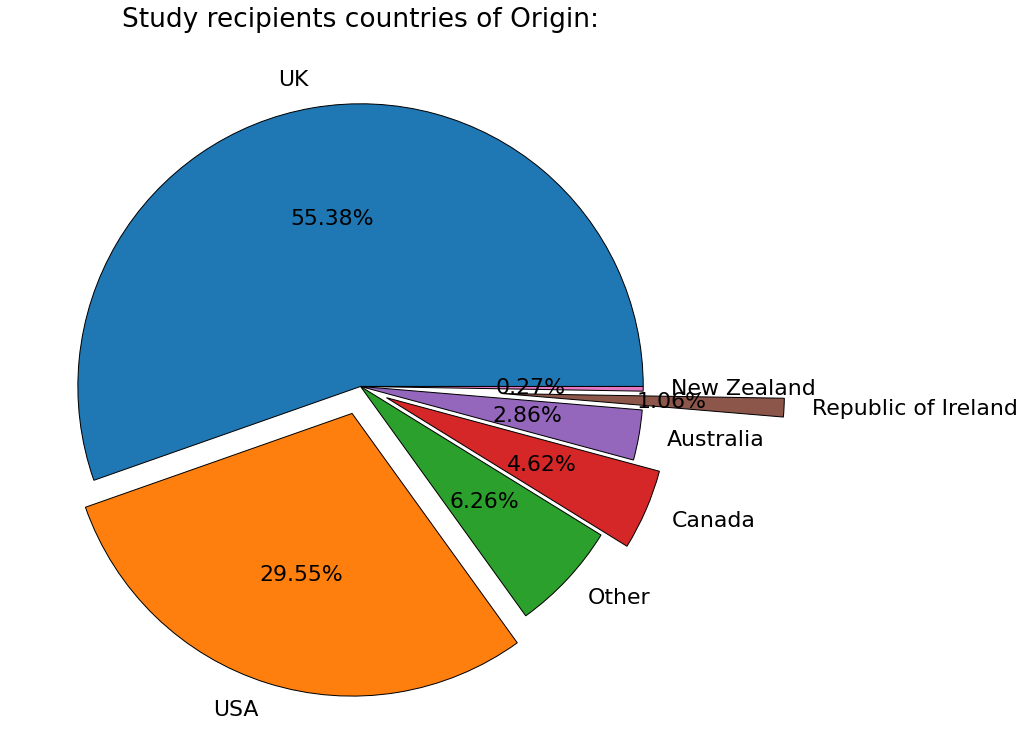

In [18]:
plt.figure(figsize=(13,13));
plt.rcParams.update({'font.size':22})
x = df_readable["Country"].value_counts()#.plot(kind='pie')
labels= x.index.to_list()
plt.title('Study recipients countries of Origin:')
plt.pie(x,explode=(0,0.1,0,0.1,0,0.5,0),labels=labels, autopct='%1.2f%%')
plt.savefig('pictures/Study_recipients_countries_of_Origin.png', transparent=True)
plt.show()

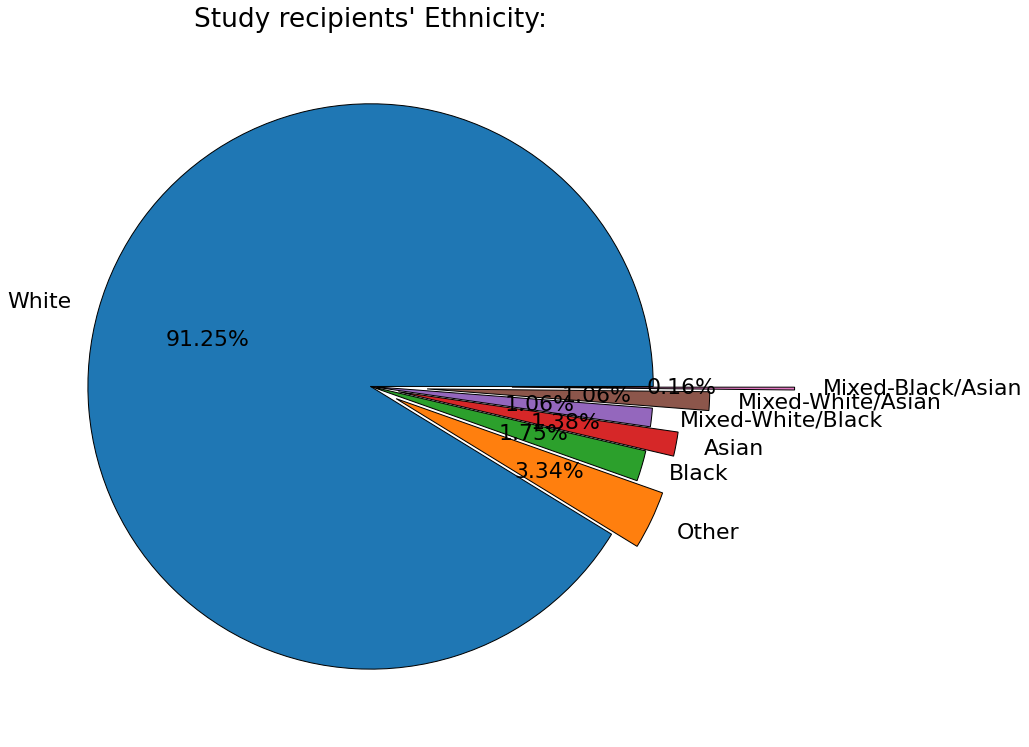

In [19]:
plt.figure(figsize=(13,13));
plt.rcParams.update({'font.size':22})
x = df_readable["Ethnicity"].value_counts()
labels= x.index.to_list()
plt.title("Study recipients' Ethnicity:")
plt.pie(x,explode=(0,0.1,0,0.1,0,0.2,0.5),labels=labels, autopct='%1.2f%%')
plt.savefig('pictures/Study_recipients_ethnicity.png', transparent=True)
plt.show()

In [331]:
# decrypt "Ethnicity" column:
df_readable['Ethnicity'] = df_readable['Ethnicity'].map({'Asian':3,
                            'Black':2,
                             'Mixed-Black/Asian':6,
                             'Mixed-White/Asian':5,
                             'Mixed-White/Black':4,
                             'Other':1,
                            'White':0,
                             },)

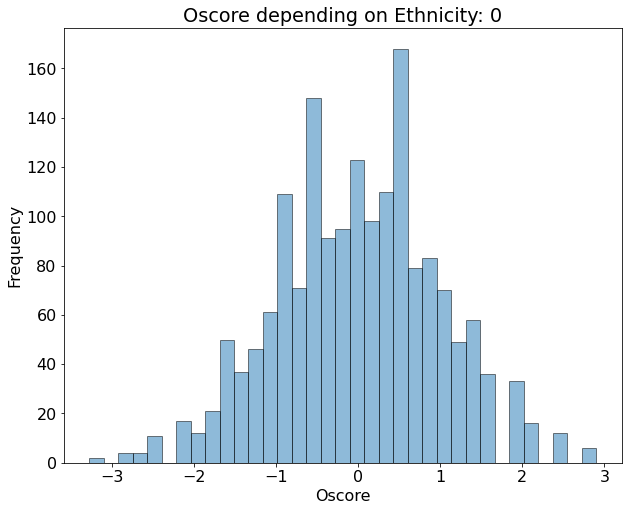

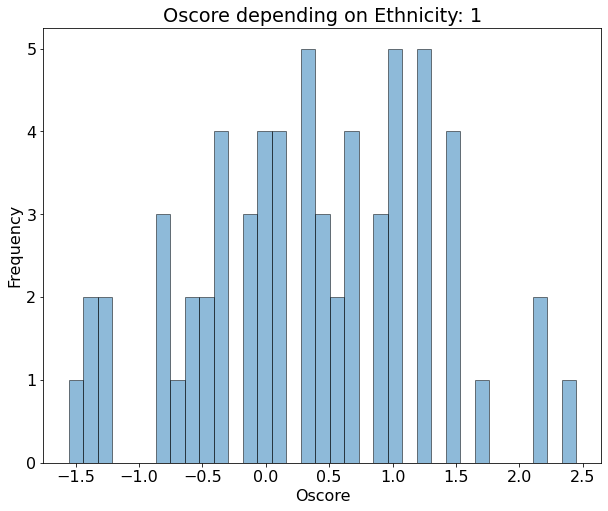

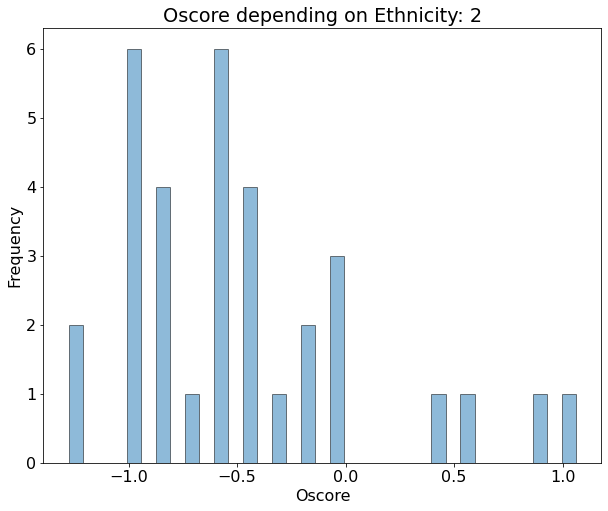

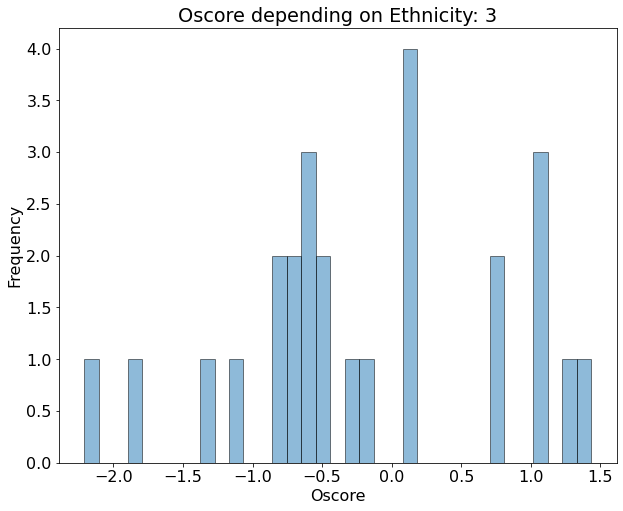

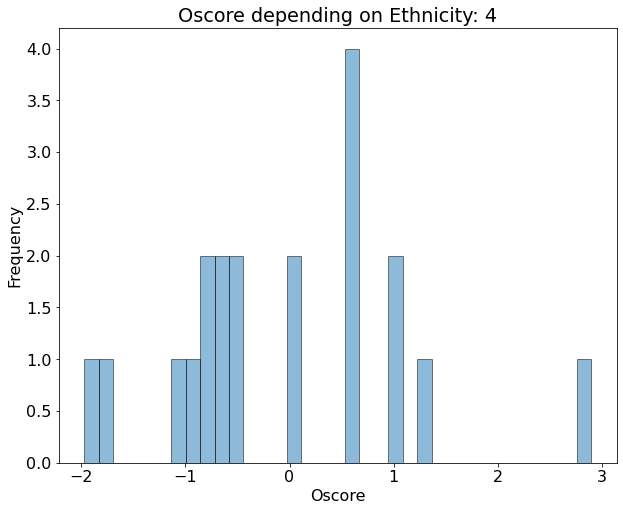

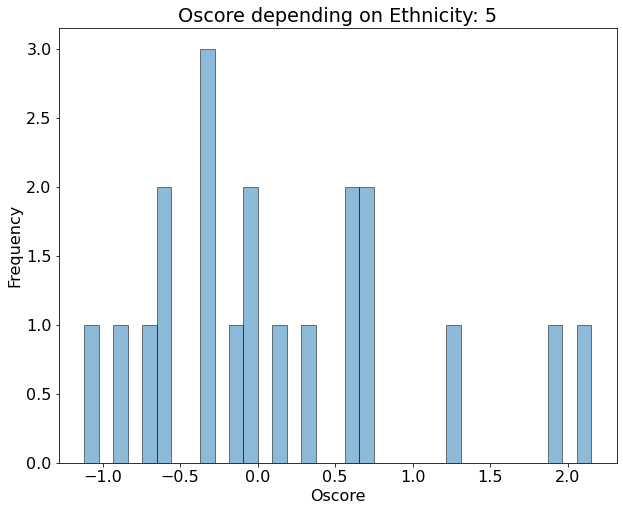

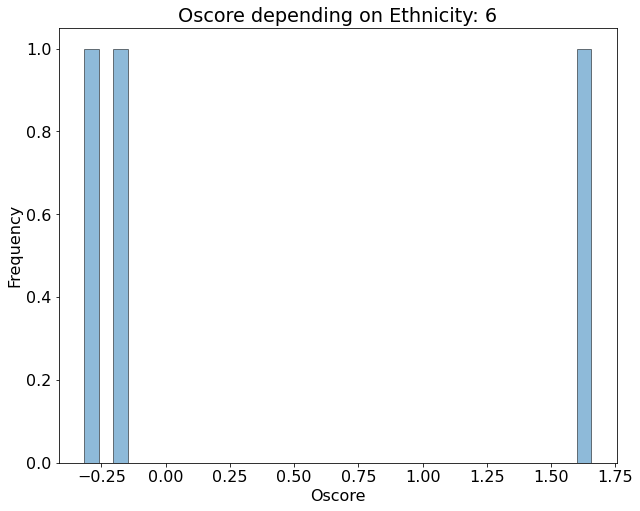

In [332]:
x = df_readable["Ethnicity"].value_counts()
ethnicity_list = x.index.to_list()
for ethnicity in ethnicity_list:
    plt.figure(figsize=(10,8));
    plt.rcParams.update({'font.size':16})
    plt.xlabel('Oscore')
    plt.ylabel('Count')
    plt.title(f'Oscore depending on Ethnicity: {ethnicity}')
    #plt.xlim([10000, 30000])
    #fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=43, alpha=0.9)

    fig = df_readable.query(f"Ethnicity == {ethnicity}")["Oscore"].plot.hist(bins=35, alpha=0.5)

/Users/borisgeller/neuefische/Drug-Consumption/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1152x1152 with 0 Axes>

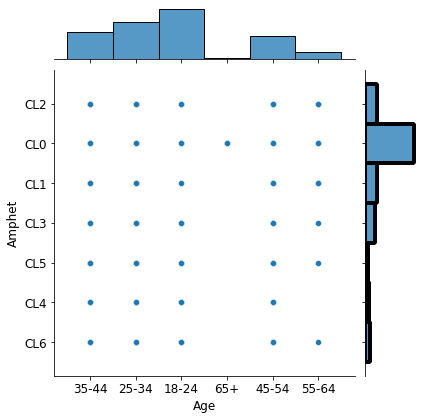

In [291]:
plt.figure(figsize=(16,16));
plt.rcParams.update({'font.size':12})
g = sns.jointplot(df_readable["Age"],df.Amphet, hue=None)
# Show the plot


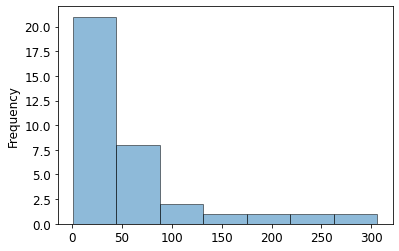

In [292]:
ax = df_readable.groupby("Amphet", axis=0)["Age"].value_counts().plot.hist(bins=7, alpha=0.5)

In [293]:
for category in cat_features:
    df_readable[category] = df_readable[category].map({'CL0':0,
                            'CL1':0,
                            'CL2':0,
                            'CL3':1,
                            'CL4':1,
                            'CL5':1,
                            'CL6':1,
                             },)
        

In [294]:
df_readable.head(15)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,35-44,Female,1,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,25-34,Male,1,UK,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,0,0,0,1,0,1,0,0
2,3,35-44,Male,1,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,18-24,Female,1,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
4,5,35-44,Female,1,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0
5,6,65+,Female,0,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,1,0,0
6,7,45-54,Male,1,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,0,0,0,0,0,0,0,1,0,0
7,8,35-44,Male,0,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,0,0,0,0,0,0,0,0,0,0
8,9,35-44,Female,1,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,0,0,0,0,0,0,0,1,0,0
9,10,55-64,Male,1,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,0,0,0,0,0,0,0,1,0,0


In [295]:
df_readable["Semer"].value_counts()

0    1882
1       3
Name: Semer, dtype: int64

Introducing new Columns: Legal_Usage, Low_Risk_Usage, High_Risk_Usage, wherein all drugs are categorized in three classes Legal drugs (i.e. Nicotin, Alcohol etc.), low risk(marijuana, caffeine, chocolate etc.) & high risk (Ecstasy, Heroine, Crack, Methamphetamine etc.). These columns are boolean: Usage is true if it is more than or equal to CL3: Used in last year

In [296]:
# introducing a new column "Legal_Usage" to the dataset df_readable:
legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Legalh', 'Nicotine']

df_readable.eval("Legal_usage = Alcohol + Caff + Choc + Legalh + Nicotine", inplace = True)
df_readable['Legal_usage'] = df_readable['Legal_usage'].apply(lambda x: 1 if x >= 1 else 0);

# introducing a new column "Low_Risk_Usage" to the dataset df_readable:
Low_Risk_drugs = ['Benzos', 'Cannabis', 'Shrooms', 'Amyl']

df_readable.eval("Low_Risk_Usage = Benzos + Cannabis + Shrooms + Amyl", inplace = True)
df_readable['Low_Risk_Usage'] = df_readable['Low_Risk_Usage'].apply(lambda x: 1 if x >= 1 else 0);

# introducing a new column "High_Risk_Usage" to the dataset df_readable:
High_Risk_drugs = ['Amphet', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth']

df_readable.eval("High_Risk_Usage = Amphet + Coke + Crack + Ecstasy + Heroin + Ketamine + LSD + Meth", inplace = True)
df_readable['High_Risk_Usage'] = df_readable['High_Risk_Usage'].apply(lambda x: 1 if x >= 1 else 0);



In [297]:
df_readable["High_Risk_Usage"].value_counts()

0    1027
1     858
Name: High_Risk_Usage, dtype: int64

In [298]:
df_readable["Low_Risk_Usage"].value_counts()

1    1125
0     760
Name: Low_Risk_Usage, dtype: int64

In [299]:
df_readable["Legal_usage"].value_counts()

1    1882
0       3
Name: Legal_usage, dtype: int64

In [300]:
df_readable.head(25)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,Legal_usage,Low_Risk_Usage,High_Risk_Usage
0,1,35-44,Female,1,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,25-34,Male,1,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,1,0,1,0,0,1,1,1
2,3,35-44,Male,1,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,1,0
3,4,18-24,Female,1,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,1,1,0
4,5,35-44,Female,1,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,1,1,0
5,6,65+,Female,0,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,1,0,0,1,0,0
6,7,45-54,Male,1,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,...,0,0,0,0,1,0,0,1,0,0
7,8,35-44,Male,0,UK,White,-1.32828,1.93886,-0.84732,-0.30172,...,0,0,0,0,0,0,0,1,0,0
8,9,35-44,Female,1,Canada,White,0.62967,2.57309,-0.97631,0.76096,...,0,0,0,0,1,0,0,1,0,0
9,10,55-64,Male,1,UK,White,-0.24649,0.00332,-1.42424,0.59042,...,0,0,0,0,1,0,0,1,0,0


In [301]:
df_readable["Alcohol"].value_counts()

1    1749
0     136
Name: Alcohol, dtype: int64

In [302]:
df_readable["Ecstasy"].value_counts()

0    1368
1     517
Name: Ecstasy, dtype: int64

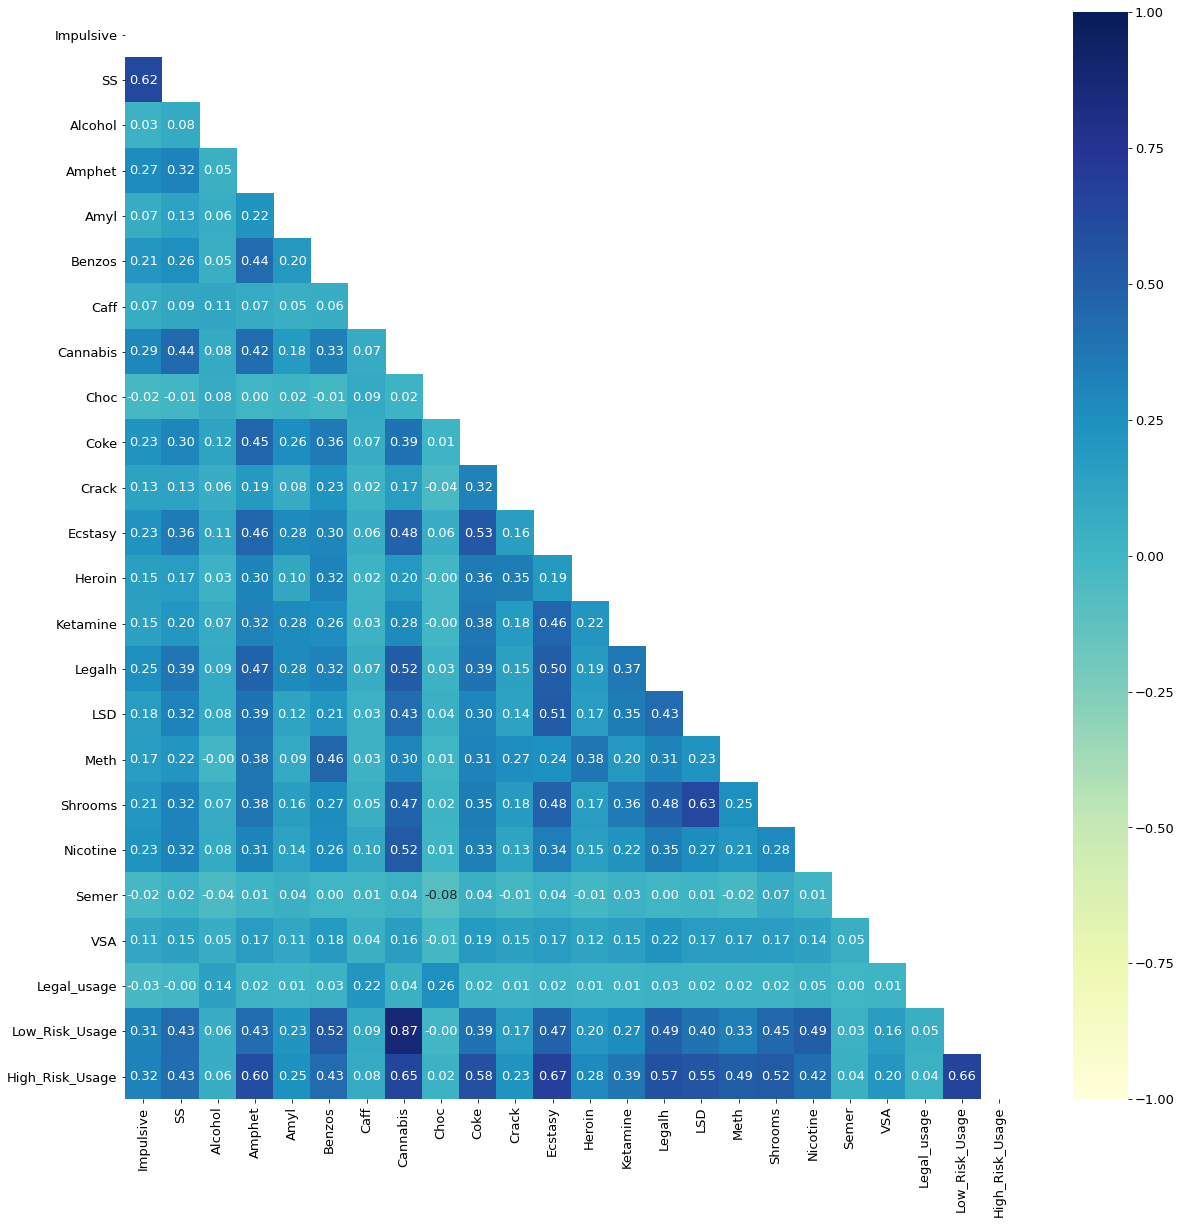

In [303]:
# Correlation heatmap 
plt.figure(figsize=(20,20));
plt.rcParams.update({'font.size':13})
correlations = df_readable.iloc[:, 11:].corr()
mask = np.triu(correlations)
sns.heatmap(correlations ,fmt='.2f', vmax=1, vmin=-1, annot=True, mask=mask, cmap="YlGnBu");
plt.savefig('pictures/Correlation_Heatmap2.png', transparent=True)

reduce Data Set for Machine learning Phase :

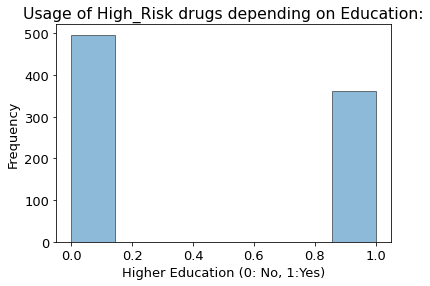

In [305]:
plt.xlabel('Higher Education (0: No, 1:Yes)')
plt.ylabel('Frequency')
plt.title('Usage of High_Risk drugs depending on Education:')
fig = df_readable.query("High_Risk_Usage == 1")["Education"].plot.hist(bins=7, alpha=0.5)
#fig = df_ml.query("High_Risk_Usage == 0")["Education"].plot.hist(bins=7, alpha=0.3)

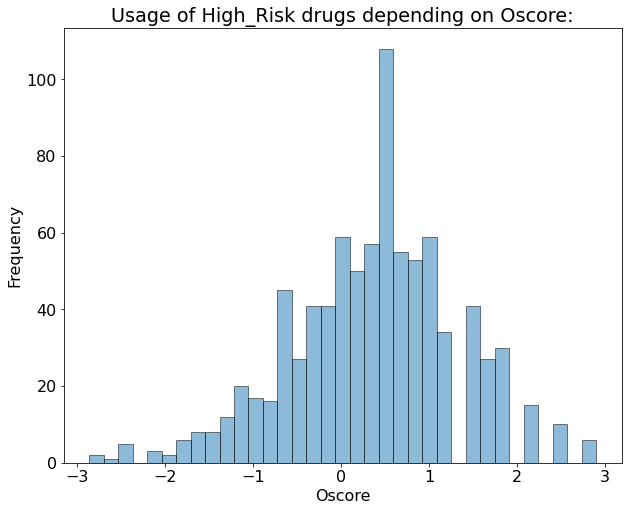

In [306]:
plt.figure(figsize=(10,8));
plt.rcParams.update({'font.size':16})
plt.xlabel('Oscore')
plt.ylabel('Count')
plt.title('Usage of High_Risk drugs depending on Oscore:')
#plt.xlim([10000, 30000])
#fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=43, alpha=0.9)
fig = df_readable.query("High_Risk_Usage == 1")["Oscore"].plot.hist(bins=35, alpha=0.5)

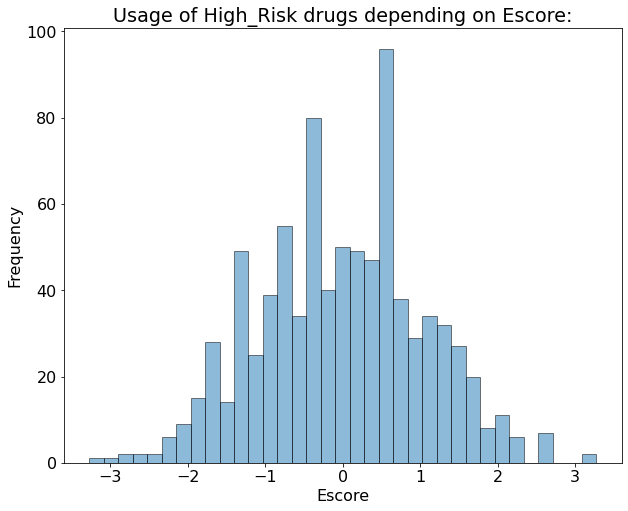

In [307]:
plt.figure(figsize=(10,8));
plt.rcParams.update({'font.size':16})
plt.xlabel('Escore')
plt.ylabel('Count')
plt.title('Usage of High_Risk drugs depending on Escore:')
#plt.xlim([10000, 30000])
#fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=43, alpha=0.9)
fig = df_readable.query("High_Risk_Usage == 1")["Escore"].plot.hist(bins=35, alpha=0.5)

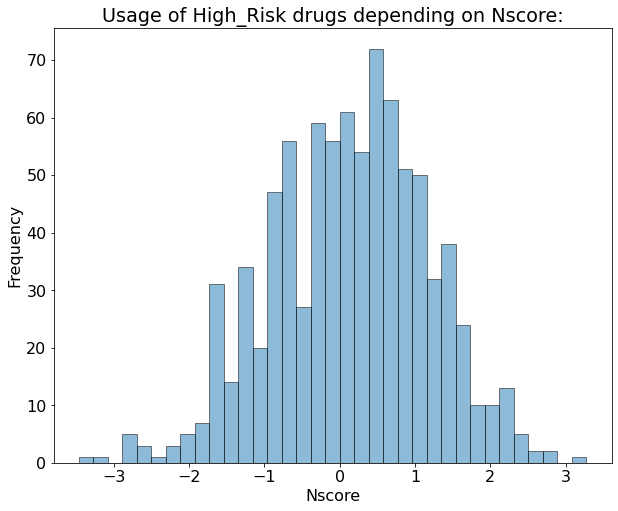

In [308]:
plt.figure(figsize=(10,8));
plt.rcParams.update({'font.size':16})
plt.xlabel('Nscore')
plt.ylabel('Count')
plt.title('Usage of High_Risk drugs depending on Nscore:')
#plt.xlim([10000, 30000])
#fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=43, alpha=0.9)
fig = df_readable.query("High_Risk_Usage == 1")["Nscore"].plot.hist(bins=35, alpha=0.5)

Splitting the Data into features and target:

Improving the Model via Model Tuning: